# 개체명 태그 데이터 EDA

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import numpy as np

# class 테스트

In [140]:
class DataEDA:
    def __init__ (self):
        self.data_dict = dict()
        self.data_df = pd.DataFrame()

    # csv 파일 읽기 -------------------------------------------------------------------------------
    def read_csv(self, path: str)-> pd.DataFrame:
        try:
            df = pd.read_csv(path)
        except Exception as e:
            print(e)
            df = pd.DataFrame()
        return df
    
    # 데이터 최소, 최대, 평균, 표준편차 ------------------------------------------------------------
    def data_status(self, stat_list: list, text: str)-> dict:
        stat_dict = {}

        stat_dict[f'{text} 최소'] = min(stat_list) 
        stat_dict[f'{text} 최대'] = max(stat_list)
        stat_dict[f'{text} 평균'] = int(sum(stat_list)/len(stat_list))
        stat_dict[f'{text} 표준 편차'] = int(np.std(stat_list)) 

        return stat_dict
    
    # 특허별 문장 건수  --------------------------------------------------------------------------------------------
    def _setence_count_per_pt(self, df: pd.DataFrame)-> dict:
        unique_pt_group = df.groupby(['특허번호'])

        sentence_per_pt = []
        for idx, data in unique_pt_group:
            sentence_per_pt.append(len(set(data['문장번호'])))

        return self.data_status(sentence_per_pt, '문장 건수')
    
    # 문장 길이 -----------------------------------------------------------------------------------------------
    def _sentence_length(self, df: pd.DataFrame)-> dict:
        unique_pt_sen_group = df.groupby(['특허번호', '문장번호'])

        sentence_len_list = []
        for idx, data in unique_pt_sen_group:
            sentence = data['문장'].iloc[0]
            sentence_len_list.append(len(sentence))

        return self.data_status(sentence_len_list, '문장 길이')

    # 기본 통계 (파일이름, 행수, 특허건수, 전체 문장 건수) ------------------------------------------------------------------
    def base_eda(self, df: pd.DataFrame, filename: str)-> dict:
        df_eda_dict = {}
        df_eda_dict['파일이름'] = filename.replace(".csv", "")
        df_eda_dict['행수'] = len(df)

        unique_pt = df['특허번호'].dropna().unique(); df_eda_dict['특허 건수'] = len(unique_pt) # 특허 건수 카운팅
        unique_pt_sen_group = df.groupby(['특허번호', '문장번호']); df_eda_dict['전체 문장 건수'] = len(unique_pt_sen_group.groups) # 전체 문장 건수

        # bio 태그 별 건수
        tag_group = df.groupby('BIO')
        for idx, data in tag_group:
            df_eda_dict[idx] = len(data)

        return df_eda_dict

    # main -----------------------------------------------------------------------------------------------------------------
    def run(self, data_path: str="./data/ner_dic_ami"):
        data_file_list = os.listdir(data_path)

        for filename in tqdm(data_file_list):
            df = self.read_csv(os.path.join(data_path, filename))
            df[['특허번호', '문장번호', '문장']] = df[['특허번호', '문장번호', '문장']].ffill() # nan값 채우기

            base_dict = self.base_eda(df, filename)
            self.data_df = pd.concat([self.data_df, pd.DataFrame([base_dict])])

In [141]:
test = DataEDA()
test.run("./data/ner_dic_ami")

100%|██████████| 4/4 [00:00<00:00, 31.51it/s]


In [138]:
test.data_df

,파일이름,행수,특허 건수,전체 문장 건수,B_TRM,I_TRM,O
0,G06V_클라우드컴퓨터,27520,24,459,3353,3670,20006
0,G06W_빅데이터,5199,5,122,538,506,4140
0,G06Y_인공지능,106302,99,1783,14820,14318,76137
0,G16Y_사물인터넷,4130,6,76,670,512,2845


# 기타

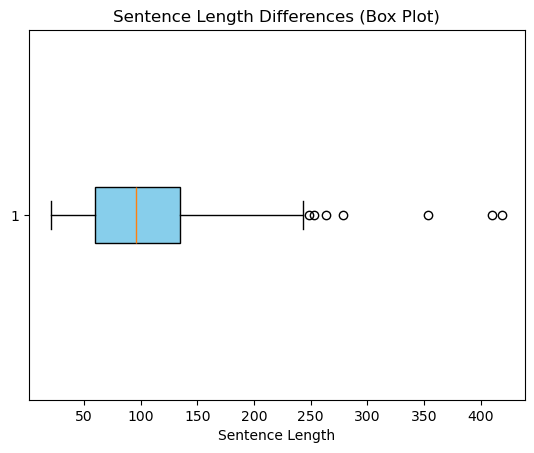

In [72]:
# # 문장길이 박스플롯
# plt.boxplot(sentence_len_list, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
# plt.title("Sentence Length Differences (Box Plot)")
# plt.xlabel("Sentence Length")
# plt.show()